In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in notebook
%matplotlib inline
plt.style.use("ggplot")

# Load your Excel sheet
df = pd.read_excel("firmfirm.csv")

# Clean up column names if needed
df.columns = df.columns.str.strip()

# Drop rows where tickers or entry prices are missing
df = df.dropna(subset=["Ticker", "Entry Price", "Shares", "Price"])

ValueError: Excel file format cannot be determined, you must specify an engine manually.

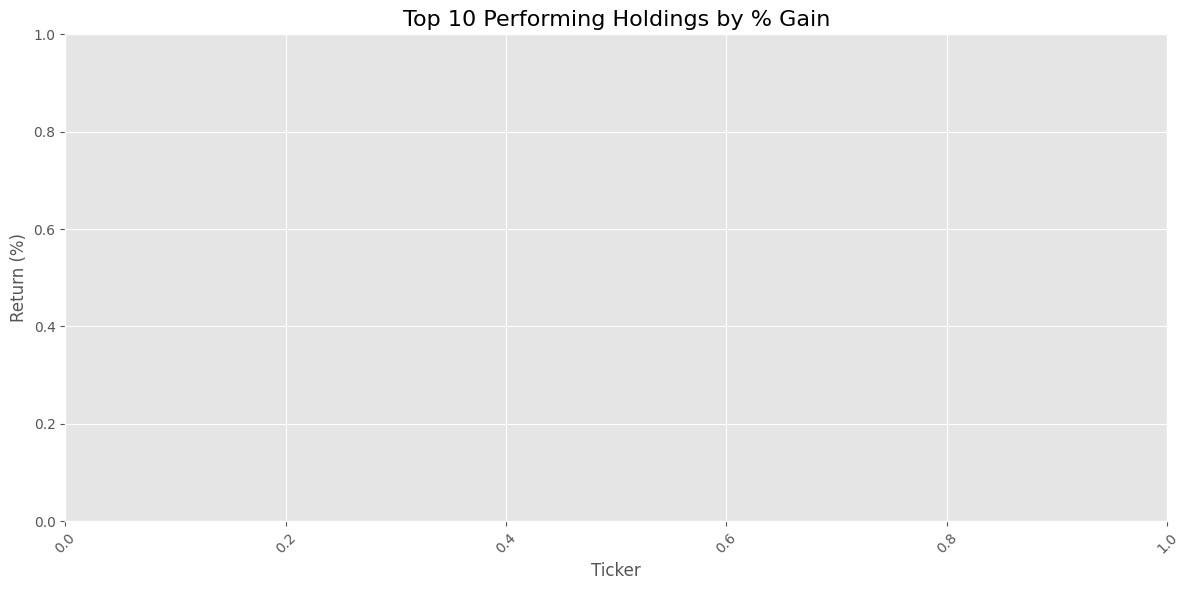

In [ ]:
# Sort and get top 10 performing tickers by % gain
top_returns = df.sort_values("Gain/Loss %", ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_returns, x="Ticker", y="Gain/Loss %", palette="coolwarm")

# Style
plt.title("Top 10 Performing Holdings by % Gain", fontsize=16)
plt.ylabel("Return (%)")
plt.xlabel("Ticker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

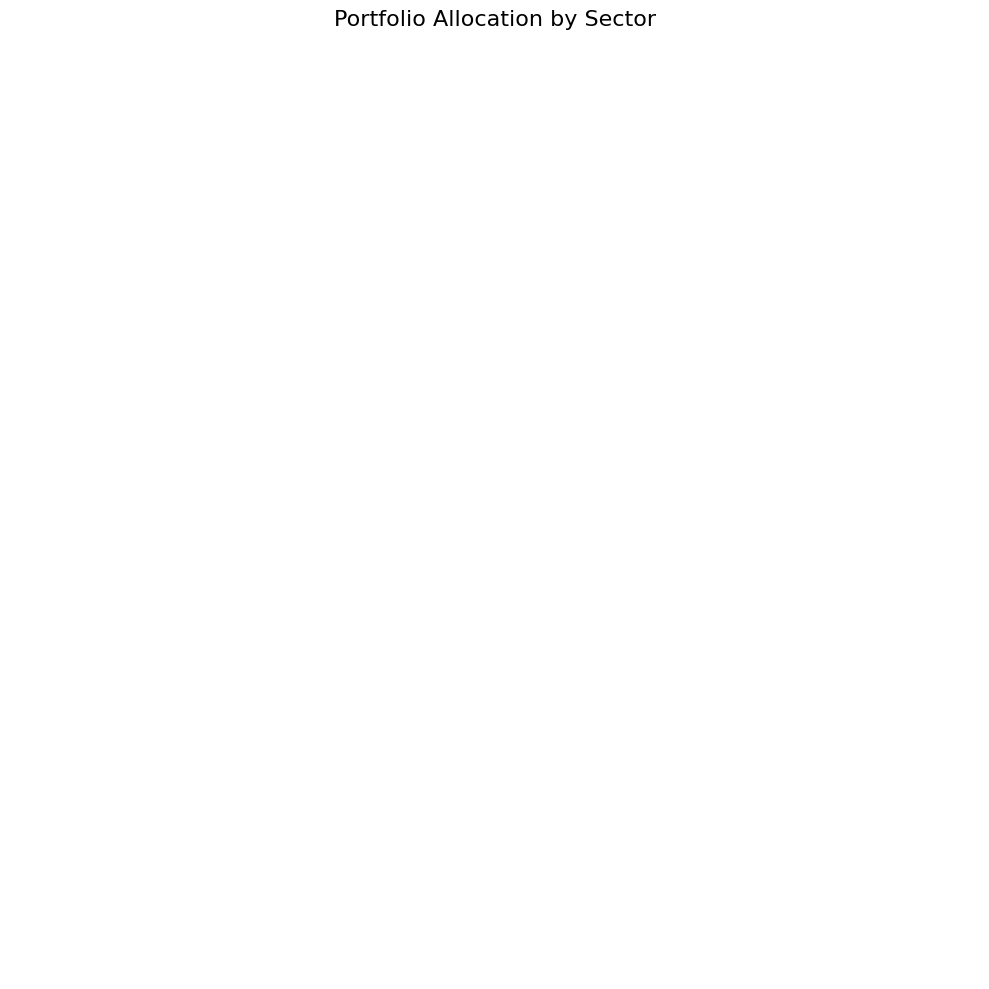

In [ ]:
sector_alloc = df.groupby("Industry")["Current Value"].sum()
plt.figure(figsize=(10, 10))
plt.pie(sector_alloc, labels=sector_alloc.index, autopct="%1.1f%%", startangle=140)
plt.title("Portfolio Allocation by Sector", fontsize=16)
plt.axis("equal")
plt.tight_layout()
plt.show()

/var/folders/kz/cc2y6j3953z1bgkfgj5xk9yc0000gn/T/ipykernel_63573/3599790443.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


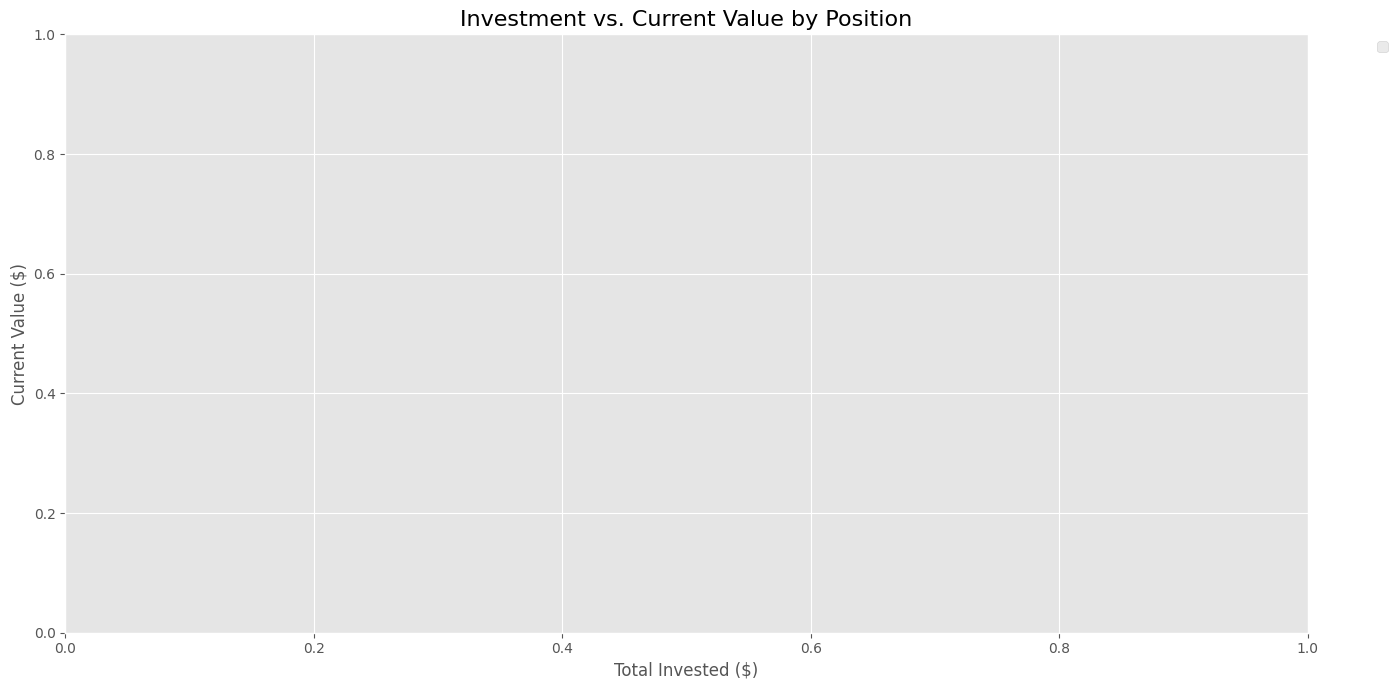

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df,
    x="Total Invested",
    y="Current Value",
    size="Gain/Loss %",
    hue="Industry",
    sizes=(40, 600),
    alpha=0.7,
    edgecolor="gray"
)
plt.title("Investment vs. Current Value by Position", fontsize=16)
plt.xlabel("Total Invested ($)")
plt.ylabel("Current Value ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

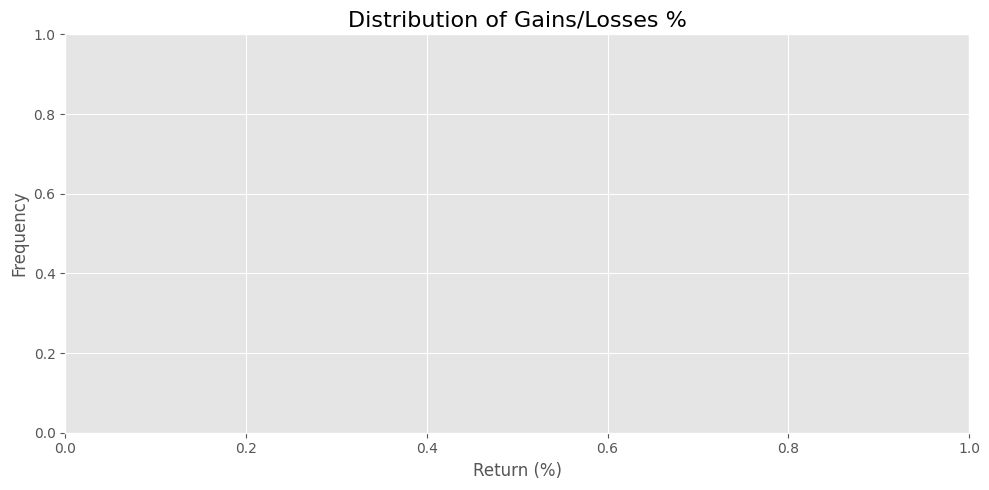

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Gain/Loss %"], bins=25, kde=True, color="teal")
plt.title("Distribution of Gains/Losses %", fontsize=16)
plt.xlabel("Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Strip and normalize column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r"\s+", " ", regex=True)